In [119]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset
%matplotlib inline
import imageio
from skimage.transform import resize

In [120]:
Xtrain,ytrain, Xtest, ytest, classes = load_dataset()

y= [1] ,it's a cat image


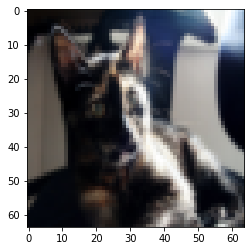

In [121]:
index=54
if ytrain[:,index]==1:
    id='cat'
else:
    id='non cat'
plt.imshow(Xtrain[index])
print('y= '+str(ytrain[:,index])+' ,it\'s a '+id+' image' )

In [122]:
mtrain=Xtrain.shape[0]
mtest=Xtest.shape[0]
numpix=Xtrain.shape[1]

print('no of training examples = ',mtrain)
print('No of test examples = ' ,mtest)
print('Height/Width of each image =',numpix )

no of training examples =  209
No of test examples =  50
Height/Width of each image = 64


In [123]:
Xtrain=Xtrain.reshape(Xtrain.shape[0],-1).T
Xtest=Xtest.reshape(Xtest.shape[0],-1).T

In [124]:
Xtrain=Xtrain/255
Xtest=Xtest/255

In [125]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [126]:
def initialize(dim):
    w = np.zeros((dim,1))
    b = 0
    return w, b

In [127]:
def propagate(w,b,X,y):
    
    m=np.size(y)
    A=sigmoid(w.T.dot(X)+b)
    cost=(-1/m)*np.sum(y*np.log(A)+(1-y)*np.log(1-A))
    
    dw=(1/m)*X.dot((A-y).T)
    db=(1/m)*np.sum(A-y)

    return cost,dw,db

In [128]:
def optimize(w,b,X,y,num,alpha):
    costlist=[]
    for i in range(num):
        
        cost,dw,db=propagate(w,b,X,y)
        w=w-alpha*dw
        b=b-alpha*db
        
        if i%100==0:
            costlist.append(cost)
            print('Cost of iteratation %i : %f'%(i,cost))
            
    param={'w':w,'b':b}
    grads={'dw':dw,'db':db}
    
    return param,grads,costlist

In [129]:
def predict(w,b,X):
    m=X.shape[1]
    yhat=np.zeros((1,m))
    w=w.reshape(X.shape[0],1)
    
    A=sigmoid(w.T.dot(X)+b)
    for i in range(m):
        if A[0,i]>0.5:
            yhat[0,i]=1
    return yhat

In [130]:
def model(Xtrain,ytrain,Xtest,ytest,num,alpha):
    w,b=initialize(Xtrain.shape[0])
    
    param,grads,costlist=optimize(w,b,Xtrain,ytrain,num,alpha)
    w=param['w']
    b=param['b']
    
    yhattrain=predict(w,b,Xtrain)
    yhattest=predict(w,b,Xtest)
    
    print("train accuracy: {} %".format(100 - np.mean(np.abs(yhattrain - ytrain)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(yhattest - ytest)) * 100))
    
    d = {"costs": costlist,
         "Y_prediction_test": yhattest, 
         "Y_prediction_train" : yhattrain, 
         "w" : w, 
         "b" : b,
         "learning_rate" : alpha,
         "num_iterations": num}
    
    return d

In [131]:
d=model(Xtrain,ytrain,Xtest,ytest,2000,0.005)

Cost of iteratation 0 : 0.693147
Cost of iteratation 100 : 0.584508
Cost of iteratation 200 : 0.466949
Cost of iteratation 300 : 0.376007
Cost of iteratation 400 : 0.331463
Cost of iteratation 500 : 0.303273
Cost of iteratation 600 : 0.279880
Cost of iteratation 700 : 0.260042
Cost of iteratation 800 : 0.242941
Cost of iteratation 900 : 0.228004
Cost of iteratation 1000 : 0.214820
Cost of iteratation 1100 : 0.203078
Cost of iteratation 1200 : 0.192544
Cost of iteratation 1300 : 0.183033
Cost of iteratation 1400 : 0.174399
Cost of iteratation 1500 : 0.166521
Cost of iteratation 1600 : 0.159305
Cost of iteratation 1700 : 0.152667
Cost of iteratation 1800 : 0.146542
Cost of iteratation 1900 : 0.140872
train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


Text(0.5, 1.0, 'learning rate = 0.005')

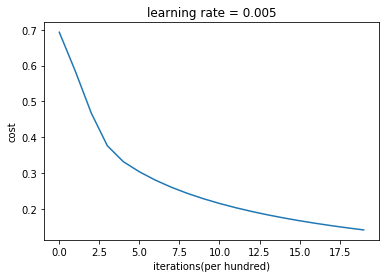

In [132]:
costs=np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations(per hundred)')
plt.title('learning rate = '+str(d['learning_rate']))

learning rate is: 0.01
Cost of iteratation 0 : 0.693147
Cost of iteratation 100 : 0.823921
Cost of iteratation 200 : 0.418944
Cost of iteratation 300 : 0.617350
Cost of iteratation 400 : 0.522116
Cost of iteratation 500 : 0.387709
Cost of iteratation 600 : 0.236254
Cost of iteratation 700 : 0.154222
Cost of iteratation 800 : 0.135328
Cost of iteratation 900 : 0.124971
Cost of iteratation 1000 : 0.116478
Cost of iteratation 1100 : 0.109193
Cost of iteratation 1200 : 0.102804
Cost of iteratation 1300 : 0.097130
Cost of iteratation 1400 : 0.092043
train accuracy: 99.52153110047847 %
test accuracy: 68.0 %

-------------------------------------------------------

learning rate is: 0.001
Cost of iteratation 0 : 0.693147
Cost of iteratation 100 : 0.591289
Cost of iteratation 200 : 0.555796
Cost of iteratation 300 : 0.528977
Cost of iteratation 400 : 0.506881
Cost of iteratation 500 : 0.487880
Cost of iteratation 600 : 0.471108
Cost of iteratation 700 : 0.456046
Cost of iteratation 800 : 0.442

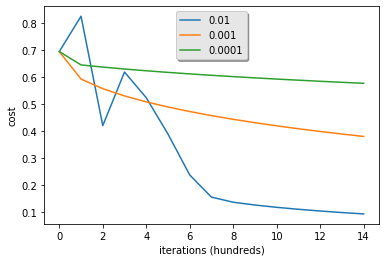

In [133]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(Xtrain, ytrain, Xtest, ytest, 1500, i)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

y = 1.0, your algorithm predicts a "cat" picture.


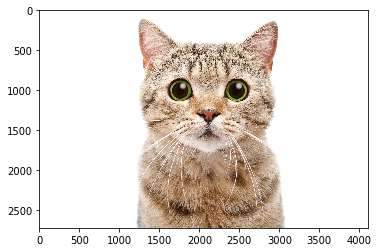

In [134]:
my_image = "cat.jpg"
fname = "images/" + my_image
image = np.array(imageio.imread(fname, as_gray=False))
image = image/255.
myimage=resize(image,(64,64))
myimage=myimage.reshape((1,64*64*3)).T
my_predicted_image = predict(d["w"], d["b"], myimage)
plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")

y = 0.0, your algorithm predicts a "non-cat" picture.


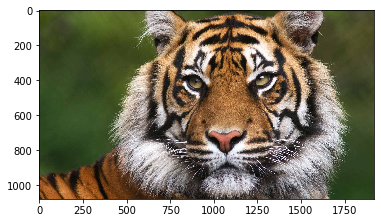

In [135]:
my_image = "Tiger.jpg"
fname = "images/" + my_image
image = np.array(imageio.imread(fname, as_gray=False))
image = image/255.
myimage=resize(image,(64,64))
myimage=myimage.reshape((1,64*64*3)).T
my_predicted_image = predict(d["w"], d["b"], myimage)
plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")

y = 0.0, your algorithm predicts a "non-cat" picture.


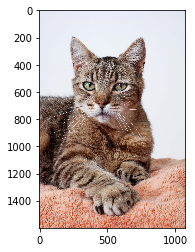

In [136]:
my_image = "cat2.jpg"
fname = "images/" + my_image
image = np.array(imageio.imread(fname, as_gray=False))
image = image/255.
myimage=resize(image,(64,64))
myimage=myimage.reshape((1,64*64*3)).T
my_predicted_image = predict(d["w"], d["b"], myimage)
plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")

y = 1.0, your algorithm predicts a "cat" picture.


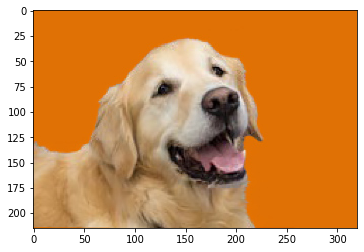

In [137]:
my_image = "dog.jpg"
fname = "images/" + my_image
image = np.array(imageio.imread(fname, as_gray=False))
image = image/255.
myimage=resize(image,(64,64))
myimage=myimage.reshape((1,64*64*3)).T
my_predicted_image = predict(d["w"], d["b"], myimage)
plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")

y = 1.0, your algorithm predicts a "cat" picture.


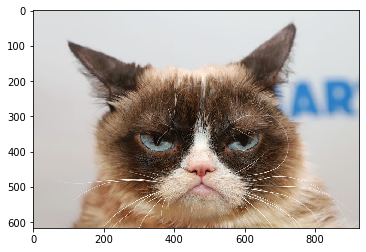

In [138]:
my_image = "cat4.jpg"
fname = "images/" + my_image
image = np.array(imageio.imread(fname, as_gray=False))
image = image/255.
myimage=resize(image,(64,64))
myimage=myimage.reshape((1,64*64*3)).T
my_predicted_image = predict(d["w"], d["b"], myimage)
plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")